In [1]:
%matplotlib inline
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# Definition des constante A, B et S 
def definition_constantes():
    B = np.matrix('-1.0; 2.0; -3.5; 1.2; 1.5')
    A = np.matrix([[ 1.0, -1.0, 2.0, -0.9, 2.1],
                   [ 1.25, 2.0, 0.5, 1.2, -0.5],
                   [ -3.0, 2.3, 0.5, 1.3, -2.5],
                   [ -2.2, 2.3, 1.5, 0.5, 1.45],
                   [ -1.2, 3.0, -0.5, 0.75, -1.5]])
    
    S = A*np.transpose(A)
    return A, B, S

In [3]:
def f1(U,B,S):
    n=U.shape[0]
    U=np.matrix(U)
    U.shape=(n,1)
    fU = np.transpose(U) * S * U - np.transpose(B) * U;
    return float(fU)


def df1(U,B,S):
    n=U.shape[0]
    U=np.matrix(U)
    U.shape=(n,1)
    dfU = 2 * S * U - B
    dfU = np.array(dfU)
    dfU.shape=(n,)
    return dfU


def f2(U,S):
    n=U.shape[0]
    U=np.matrix(U)
    U.shape=(n,1)
    fU = np.transpose(U) * S * U + np.transpose(U) * np.exp(U);
    return float(fU)

# Optimisation sans contraintes

## Gradient rho constant

##### Définition de la fonction

In [4]:
def gradient_rho_constant(fun, fun_der, U0, rho, tol,args):
# Fonction permettant de minimiser la fonction f(U) par rapport au vecteur U 
# Méthode : gradient à pas fixe
# INPUTS :
# - fun   : La fonction à minimiser
# - fun_der  : Le gradient de la fonction à minimiser
# - U0      : vecteur initial 
# - rho     : paramètre gérant l'amplitude des déplacement 
# - tol     : tolérance pour définir le critère d'arrêt
# - args    : Arguments pour la fonction fun
# OUTPUT : 
# - GradResults : structure décrivant la solution 


    itermax=10000  # nombre maximal d'itérations 
    xn=U0
    f=fun(xn,*args) # point initial de l'algorithme
    it=0         # compteur pour les itérations
    converged = False;
    
    points_history=[U0]
    f_history=[f]
    
    while (~converged & (it < itermax)):
        it=it+1
        dfx=fun_der(xn,*args)       # valeur courante de la fonction à minimiser
        xnp1=xn-rho*dfx             # nouveau point courant (x_{n+1})
        fnp1=fun(xnp1,*args)
        
        points_history+=[xnp1]
        f_history+=[fnp1]
        
        if abs(fnp1-f)<tol:
            converged = True
        xn=xnp1; f=fnp1;           # xnp1 : nouveau point courant

    GradResults = {
            'initial_x':U0,
            'minimum':xnp1,
            'f_minimum':fnp1,
            'iterations':it,
            'converged':converged,
            'points_history':points_history,
            'f_history':f_history
            }
    return GradResults

##### Application du gradient à pas constant pour différents pas

/Users/mehdiboubnan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in subtract


No convergence for rho = 1 

------------------------------------------------------------
No convergence for rho = 0.1 

------------------------------------------------------------
For rho = 0.01
Time elapsed (gradient_rho_constant): 0.05895090103149414
	 Number of iterations : 642
	 Minimum point : [-0.68823504  0.15332241 -0.61439915  0.48960858 -0.04326259]
	 Minimal value of f : -1.8368912354010207


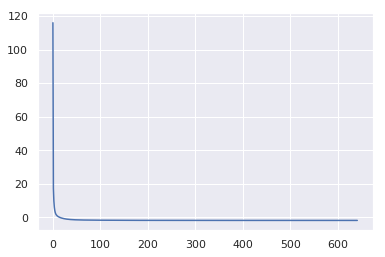



------------------------------------------------------------
For rho = 0.02
Time elapsed (gradient_rho_constant): 0.03231477737426758
	 Number of iterations : 346
	 Minimum point : [-0.69056385  0.15469913 -0.61430107  0.4909626  -0.04630803]
	 Minimal value of f : -1.8369273558471515


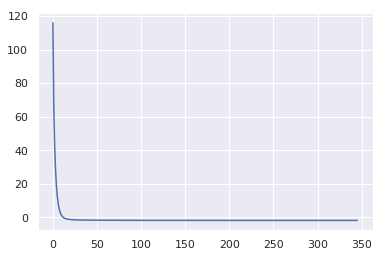



------------------------------------------------------------
No convergence for rho = 0.04 

------------------------------------------------------------
For rho = 0.001
Time elapsed (gradient_rho_constant): 0.21236300468444824
	 Number of iterations : 4743
	 Minimum point : [-0.67112026  0.14320469 -0.61511994  0.47965764 -0.02088116]
	 Minimal value of f : -1.8362366434463686


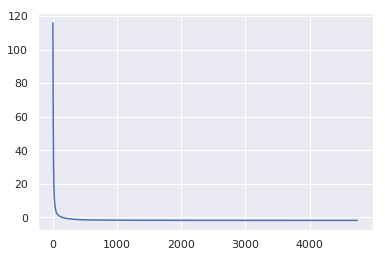



------------------------------------------------------------
No convergence for rho = 0.0001 

------------------------------------------------------------
Rhos and fmins :


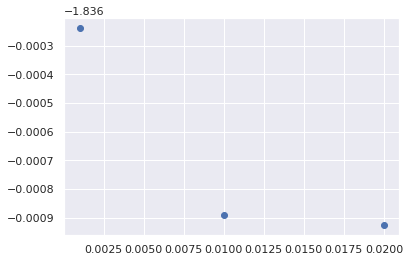

	 rho for least iterations : 0.02 with 346 iterations
	 rho for least time : 0.02 with 0.03231477737426758 s
	 rho for least fmin : 0.02 with f-min = -1.8369273558471515


In [5]:
A,B,S = definition_constantes()
d=B.shape[0]
x0 = np.ones((d,))

rho_converged=[]
f_converged=[]
iterations=[]
times=[]

rho_list=[1,0.1,0.01,0.02,0.04,0.001,0.0001]

for rho in rho_list:
    debut = time.time()
    GradResults=gradient_rho_constant(f1,df1,x0,rho=rho,tol=1e-6,args=(B,S))
    tps_ecoule = time.time()-debut
    
    if GradResults["converged"]:
        rho_converged+=[rho]
        f_converged+=[GradResults['f_minimum']]
        iterations+=[len(GradResults["f_history"])]
        times+=[tps_ecoule]
        
        print("For rho =",rho)
        print('Time elapsed (gradient_rho_constant):',tps_ecoule)
        print("\t","Number of iterations :",len(GradResults["f_history"]))
        print("\t","Minimum point :",GradResults['minimum'])
        print("\t","Minimal value of f :",GradResults['f_minimum'])
        
        plt.plot(range(len(GradResults["f_history"])),GradResults["f_history"])
        plt.show()
        
        print("\n")
        print("------------------------------------------------------------")
    
    else :
        print("No convergence for rho =",rho,"\n")
        print("------------------------------------------------------------")

print("Rhos and fmins :")
plt.plot(rho_converged,f_converged,"o")
plt.show()

print("\t","rho for least iterations :",rho_converged[iterations.index(min(iterations))],"with",min(iterations),"iterations")
print("\t","rho for least time :",rho_converged[times.index(min(times))],"with",min(times),"s")
print("\t","rho for least fmin :",rho_converged[f_converged.index(min(f_converged))],"with f-min =",min(f_converged))

## Gradient rho adaptatif

##### Définition de la fonction

In [6]:
def gradient_rho_adaptatif(fun, fun_der, U0, rho, tol,args):
# Fonction permettant de minimiser la fonction f(U) par rapport au vecteur U 
# Méthode : gradient à pas fixe
# INPUTS :
# - han_f   : handle vers la fonction à minimiser
# - han_df  : handle vers le gradient de la fonction à minimiser
# - U0      : vecteur initial 
# - rho     : paramètre gérant l'amplitude des déplacement 
# - tol     : tolérance pour définir le critère d'arrêt
# OUTPUT : 
# - GradResults : structure décrivant la solution 


    itermax=10000  # nombre maximal d'itérations 
    xn=U0
    f=fun(xn,*args) # point initial de l'algorithme
    it=0         # compteur pour les itérations
    converged = False;
    
    points_history=[U0]
    f_history=[f]
    
    while (~converged & (it < itermax)):
        it=it+1
        dfx=fun_der(xn,*args)       # valeur courante de la fonction à minimiser
        xnp1=xn-rho*dfx             # nouveau point courant (x_{n+1})
        fnp1=fun(xnp1,*args)
        
        if fnp1<f_history[-1]:
            rho=2*rho
        else:
            rho=rho/2
        
        points_history+=[xnp1]
        f_history+=[fnp1]
        
        if abs(fnp1-f)<tol:
            converged = True
        xn=xnp1; f=fnp1;           # xnp1 : nouveau point courant

    GradResults = {
            'initial_x':U0,
            'minimum':xnp1,
            'f_minimum':fnp1,
            'iterations':it,
            'converged':converged,
            'points_history':points_history,
            'f_history':f_history
            }
    return GradResults

##### Application du gradient à rho adaptatif pour différents rho

For rho = 1
Time elapsed (gradient_rho_adaptatif): 0.026661157608032227
	 Number of iterations : 201
	 Minimum point : [-0.6920906   0.1555979  -0.6140835   0.49188073 -0.04807756]
	 Minimal value of f : -1.8369409555852307


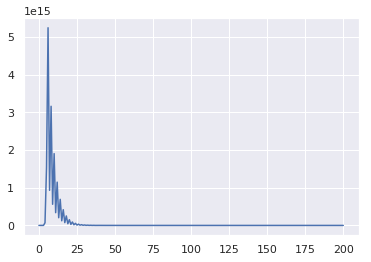



------------------------------------------------------------
For rho = 0.1
Time elapsed (gradient_rho_adaptatif): 0.012130022048950195
	 Number of iterations : 125
	 Minimum point : [-0.64801805  0.12951147 -0.61464009  0.46651389  0.01148178]
	 Minimal value of f : -1.8339602846683696


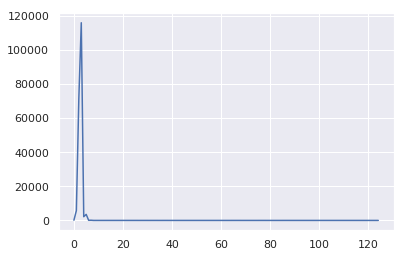



------------------------------------------------------------
No convergence with rho = 0.01 

------------------------------------------------------------
No convergence with rho = 0.02 

------------------------------------------------------------
No convergence with rho = 0.04 

------------------------------------------------------------
For rho = 0.001
Time elapsed (gradient_rho_adaptatif): 0.012998104095458984
	 Number of iterations : 223
	 Minimum point : [-0.6813617   0.14924945 -0.61429956  0.48568951 -0.0336978 ]
	 Minimal value of f : -1.8366878229642478


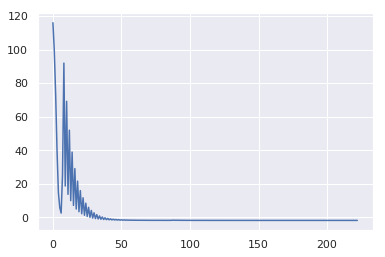



------------------------------------------------------------
For rho = 0.0001
Time elapsed (gradient_rho_adaptatif): 0.018193960189819336
	 Number of iterations : 208
	 Minimum point : [-0.68577502  0.1518605  -0.61419559  0.48823926 -0.03959053]
	 Minimal value of f : -1.836825568188052


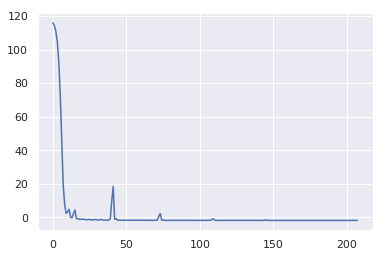



------------------------------------------------------------
Rhos and fmins :


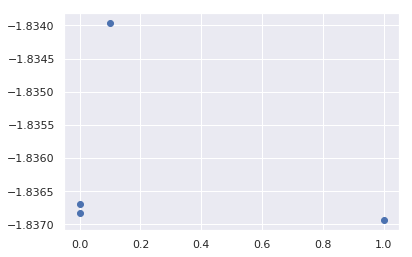

	 rho for least iterations : 0.1 with 125 iterations
	 rho for least time : 0.1 with 0.012130022048950195 s
	 rho for least fmin : 1 with f-min = -1.8369409555852307


In [7]:
A,B,S = definition_constantes()
d=B.shape[0]
x0 = np.ones((d,))

rho_converged=[]
f_converged=[]
iterations=[]
times=[]

rho_list=[1,0.1,0.01,0.02,0.04,0.001,0.0001]

for rho in rho_list:
    debut = time.time()
    GradResults=gradient_rho_adaptatif(f1,df1,x0,rho=rho,tol=1e-6,args=(B,S))
    tps_ecoule = time.time()-debut
    
    if GradResults["converged"]:
        rho_converged+=[rho]
        f_converged+=[GradResults['f_minimum']]
        iterations+=[len(GradResults["f_history"])]
        times+=[tps_ecoule]
        
        print("For rho =",rho)
        print('Time elapsed (gradient_rho_adaptatif):',tps_ecoule)
        print("\t","Number of iterations :",len(GradResults["f_history"]))
        print("\t","Minimum point :",GradResults['minimum'])
        print("\t","Minimal value of f :",GradResults['f_minimum'])
        
        plt.plot(range(len(GradResults["f_history"])),GradResults["f_history"])
        plt.show()
        
        print("\n")
        print("------------------------------------------------------------")
    
    else :
        print("No convergence with rho =",rho,"\n")
        print("------------------------------------------------------------")

print("Rhos and fmins :")
plt.plot(rho_converged,f_converged,"o")
plt.show()

print("\t","rho for least iterations :",rho_converged[iterations.index(min(iterations))],"with",min(iterations),"iterations")
print("\t","rho for least time :",rho_converged[times.index(min(times))],"with",min(times),"s")
print("\t","rho for least fmin :",rho_converged[f_converged.index(min(f_converged))],"with f-min =",min(f_converged))

## Méthode Quasi-Newton

In [8]:
from scipy.optimize import minimize

In [9]:
A,B,S = definition_constantes()
d=B.shape[0]
x0 = np.ones((d,))

debut=time.time()
Quasi_newton=minimize(f1, x0, jac=df1, args=(B,S), method='BFGS', tol=1e-6)
fin=time.time()

print(Quasi_newton.message)
print("\t","Number of iterations :",Quasi_newton.nit)
print("\t","Time elapsed :",fin-debut,"s")
print("\t","Minimal value of f :",Quasi_newton.fun)

Optimization terminated successfully.
	 Number of iterations : 10
	 Time elapsed : 0.007689952850341797 s
	 Minimal value of f : -1.836962311965253


# Optimisation sous contraintes

## Algorithme SQP

In [10]:
from scipy.optimize import minimize

In [11]:
A,B,S = definition_constantes()
d=B.shape[0]
x0 = np.ones((d,))

debut=time.time()
SQP1=minimize(f1, x0, jac=df1, args=(B,S), method='SLSQP', tol=1e-6, bounds=[(0,1)]*d)
fin=time.time()

print(SQP1.message)
print("\t","Number of iterations :",SQP1.nit)
print("\t","Time elapsed :",fin-debut,"s")
print("\t","Minimal value of f1 :",SQP1.fun)

Optimization terminated successfully.
	 Number of iterations : 9
	 Time elapsed : 0.004031181335449219 s
	 Minimal value of f1 : -0.13853161423986765


In [12]:
A,B,S = definition_constantes()
d=B.shape[0]
x0 = np.ones((d,))

debut=time.time()
SQP2=minimize(f2, x0, args=(S), method='SLSQP', tol=1e-6, bounds=[(0,1)]*d)
fin=time.time()

print(SQP2.message)
print("\t","Number of iterations :",SQP2.nit)
print("\t","Time elapsed :",fin-debut,"s")
print("\t","Minimal value of f2 :",SQP2.fun)

Optimization terminated successfully.
	 Number of iterations : 4
	 Time elapsed : 0.004869222640991211 s
	 Minimal value of f2 : 2.976067656614975e-15


## Optimisation sous contraintes et pénalisation

In [13]:
def beta(x):
    """
    Description
    ----------
    La pénalisation de x sur le pavé Uad=[0,1]^5
    """
    Beta=0
    
    for xi in x:
        Beta+=(max(0,-xi)+max(0,xi-1))**2
    
    return Beta

In [14]:
def f1penal(U, B, S, epsilon):
    return f1(U,B,S) + beta(U)/epsilon

def f2penal(U,S,epsilon):
    return f2(U,S) + beta(U)/epsilon

##### Définition de la fonction pour la méthode de pénalisation

In [15]:
def BFGS_penal(fun, U0, tol, args):
    # Fonction permettant de minimiser la fonction f(U) par rapport au vecteur U 
    # Méthode : gradient à pas fixe
    # INPUTS :
    # - fun     : fonction à minimiser
    # - U0      : vecteur initial 
    # - tol     : tolérance pour définir le critère d'arrêt
    # - args    : arguments pour la fonction à minimiser
    # OUTPUT : 
    # - Results : structure décrivant la solution 
    
    
    itermax=10000  # nombre maximal d'itérations 
    xn=U0
    f=fun(xn,*args) # point initial de l'algorithme
    it=0         # compteur pour les itérations
    converged = False;
    
    points_history=[xn]
    f_history=[f]
    
    
    while (~converged & (it < itermax)):
        it=it+1
       
        BFGS=minimize(fun=fun, x0=xn, args=args, method='BFGS', tol=1e-6)        
        
        xnp1=BFGS.x
        fnp1=fun(xnp1,*args)
        
        points_history+=[xnp1]
        f_history+=[fnp1]
        
        if abs(fnp1-f)<tol:
            converged = True
        listargs=list(args)
        listargs[-1]=listargs[-1]/2
        args=tuple(listargs)
        xn=xnp1
        f=fnp1        

    Results = {
            'initial_x':U0,
            'minimum':xnp1,
            'f_minimum':fnp1,
            'iterations':it,
            'converged':converged,
            'points_history':points_history,
            'f_history':f_history
            }
    return Results

##### Application de la méthode de pénalisation

Time elapsed : 0.344531774520874 s
Number of iterations : 25
Minimum point : [-3.53161469e-08  1.26885928e-01 -2.47327616e-07  1.94103685e-02
 -2.06874547e-08]
Minimal value of f1 : -0.13853243975221347


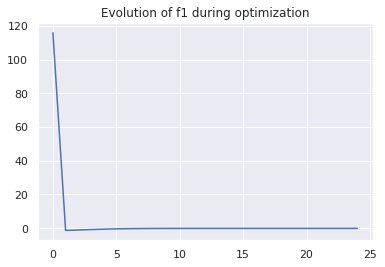

In [16]:
from scipy.optimize import minimize

A,B,S = definition_constantes()
d=B.shape[0]
x0 = np.ones((d,))

debut = time.time()
Results_f1=BFGS_penal(fun=f1penal, U0=x0, tol=1e-6, args=(B,S,1))
tps_ecoule = time.time()-debut

print('Time elapsed :',tps_ecoule, 's')
print("Number of iterations :",len(Results_f1["f_history"]))
print("Minimum point :",Results_f1['minimum'])
print("Minimal value of f1 :",Results_f1['f_minimum'])
        
plt.plot(range(len(Results_f1["f_history"])),Results_f1["f_history"])
plt.title("Evolution of f1 during optimization")
plt.show()

Time elapsed : 0.22386670112609863 s
Number of iterations : 23
Minimum point : [-2.45870177e-07 -2.45866973e-07 -2.45864400e-07 -2.45865000e-07
 -2.45865302e-07]
Minimal value of f2 : -5.95457479883209e-07


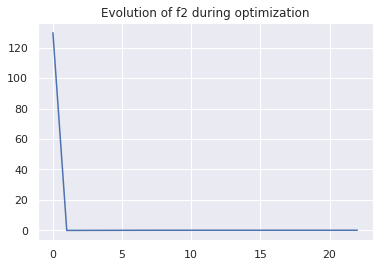

In [17]:
from scipy.optimize import minimize

A,B,S = definition_constantes()
d=B.shape[0]
x0 = np.ones((d,))

debut = time.time()
Results_f2=BFGS_penal(fun=f2penal, U0=x0, tol=1e-6, args=(S,1))
tps_ecoule = time.time()-debut

print('Time elapsed :',tps_ecoule, 's')
print("Number of iterations :",len(Results_f2["f_history"]))
print("Minimum point :",Results_f2['minimum'])
print("Minimal value of f2 :",Results_f2['f_minimum'])
        
plt.plot(range(len(Results_f2["f_history"])),Results_f2["f_history"])
plt.title("Evolution of f2 during optimization")
plt.show()

## Vérification SQP vs Penalisation

#### Vérification pour f1

In [18]:
print("Methode SQP")
print("\t","  ","Minimum point :",SQP1.x)
print("\t","  ","Minimum value of f1 :",SQP1.fun)
print("\n")
print("Methode Penalisation")
print("\t","  ","Minimum point :",Results_f1['minimum'])
print("\t","  ","Minimum value of f1 :",Results_f1['f_minimum'])

Methode SQP
	    Minimum point : [1.08020986e-15 1.26984963e-01 2.70234387e-15 1.94536212e-02
 0.00000000e+00]
	    Minimum value of f1 : -0.13853161423986765


Methode Penalisation
	    Minimum point : [-3.53161469e-08  1.26885928e-01 -2.47327616e-07  1.94103685e-02
 -2.06874547e-08]
	    Minimum value of f1 : -0.13853243975221347


#### Vérification pour f2

In [19]:
print("Methode SQP")
print("\t","  ","Minimum point :",SQP2.x)
print("\t","  ","Minimum value of f2 :",SQP2.fun)
print("\n")
print("\t","Methode Penalisation")
print("\t","  ","Minimum point :",Results_f2['minimum'])
print("\t","  ","Minimum value of f2 :",Results_f2['f_minimum'])

Methode SQP
	    Minimum point : [1.72929872e-16 2.17964615e-15 5.95736056e-16 0.00000000e+00
 2.77555756e-17]
	    Minimum value of f2 : 2.976067656614975e-15


	 Methode Penalisation
	    Minimum point : [-2.45870177e-07 -2.45866973e-07 -2.45864400e-07 -2.45865000e-07
 -2.45865302e-07]
	    Minimum value of f2 : -5.95457479883209e-07


## Méthodes duales pour l'optimisation sous contraintes

##### Définition du Lagrangien

In [20]:
def Lagrangien_f(x, lambd, f, args):
    """
    Description
    -----------
    
    Construction du Lagrangien de f pour Uad=[0,1]^5
    
    """
    
    x_bis=np.array(list((np.array(x)-1))+list(-np.array(x)))
    
    return f(x, *args)+ np.dot(x_bis,lambd)


##### Définition de la fonction pour l'algorithme Uzawa

In [21]:
def uzawa(f,args,lambda0,rho=0.1,tol=1e-6):
    
    itermax=10000
    it=0    
    converged=False
    points_history=[]
    L_history=[]
    
    x0 = np.ones((5,))
    
    xn = x0
    lambdan=lambda0
    rhon=rho
    
    points_history+=[(xn,lambdan)]
    L_history+=[Lagrangien_f(xn,lambdan,f,args)]
   
    while (~converged & (it < itermax)):
        it=it+1

        BFGS=minimize(fun=Lagrangien_f, x0=xn, args=(lambdan,f,args), method='BFGS', tol=1e-6)
        xnp1=BFGS.x
        lambdanp1=lambdan + rhon*np.array(list((np.array(xn)-1))+list(-np.array(xn)))
        lambdanp1=np.array([max(0,lambdai) for lambdai in lambdanp1])
        
        points_history+=[(xnp1,lambdanp1)]
        L_history+=[Lagrangien_f(xnp1,lambdanp1,f,args)]
        
        if abs(Lagrangien_f(xnp1,lambdanp1,f,args)-Lagrangien_f(xn,lambdan,f,args))<tol:
            converged=True
        
        xn=xnp1
        lambdan=lambdanp1
        

    Results = {
            'initial_x':x0,
            'initial_lambda':lambda0,
            'x_saddle':xnp1,
            'lambda_saddle':lambdanp1,
            'iterations':it,
            'converged':converged,
            'points_history':points_history,
            'L_history':L_history
            }
    return Results

##### Application de l'algorithme d'Uzawa

Time elapsed : 11.699950218200684 s
Number of iterations : 7205
Saddle point x : [ 4.78936858e-08  1.26885857e-01 -6.09056875e-08  1.94100534e-02
 -4.47687570e-08]
Saddle point lambda : [0.         0.         0.         0.         0.         0.56542115
 0.         4.86743829 0.         0.26860148]


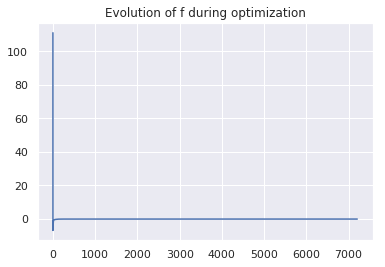

Value of f at the saddle point x : -0.1385320189675082


In [22]:
A,B,S = definition_constantes()
lambda0=np.ones((10,))

debut = time.time()
UzawaResults=uzawa(f1,(B,S),lambda0,tol=1e-15)
tps_ecoule = time.time()-debut

print('Time elapsed :',tps_ecoule, 's')
print("Number of iterations :",UzawaResults["iterations"])
print("Saddle point x :",UzawaResults['x_saddle'])
print("Saddle point lambda :",UzawaResults['lambda_saddle'])
        
plt.plot(UzawaResults["L_history"])
plt.title("Evolution of f during optimization")
plt.show()

print("Value of f at the saddle point x :",f1(UzawaResults['x_saddle'],B,S))

# Optimisation non convexe

In [23]:
def f3(U,B,S):
    return f1(U,B,S) + 10*np.sin(2*f1(U,B,S))

### Optimisation classique BFGS

In [24]:
A,B,S = definition_constantes()

for i in range(5):
    x0=np.random.randn(5, )

    debut = time.time()
    BFGS_f3=minimize(fun=f3, x0=x0, args=(B,S), method='BFGS', tol=1e-2) 
    tps_ecoule = time.time()-debut

    print(BFGS_f3.message)
    print("\t","x0 initial :",x0)
    print("\t","Number of iterations :",BFGS_f3.nit)
    print("\t","Time elapsed :",tps_ecoule,"s")
    print("\t","Minimum point :",BFGS_f3.x)
    print("\t","Minimum value of f3 :",BFGS_f3.fun)
    print("\n")

Optimization terminated successfully.
	 x0 initial : [-1.28807649 -0.24774739 -0.14136966  0.1684979  -1.5151203 ]
	 Number of iterations : 5
	 Time elapsed : 0.011664867401123047 s
	 Minimum point : [-1.28399512 -0.24717859 -0.14783614  0.16744926 -1.5185395 ]
	 Minimum value of f3 : 8.0516551526165


Desired error not necessarily achieved due to precision loss.
	 x0 initial : [-2.15807321 -0.72896832  0.58848785 -0.7379661   0.13320943]
	 Number of iterations : 2
	 Time elapsed : 0.027060985565185547 s
	 Minimum point : [-2.18824638 -0.73008984  0.61814799 -0.74682262  0.1527857 ]
	 Minimum value of f3 : 89.73306415359059


Desired error not necessarily achieved due to precision loss.
	 x0 initial : [-0.08535407  0.70617743 -0.91616772 -0.86457625 -0.87275874]
	 Number of iterations : 7
	 Time elapsed : 0.04472088813781738 s
	 Minimum point : [-0.04727416  0.69785226 -0.95291211 -0.84222123 -0.89851317]
	 Minimum value of f3 : 67.74191558018744


Optimization terminated successfully.

### Recuit simulé

In [25]:
from scipy.optimize import basinhopping

A,B,S = definition_constantes()
d=B.shape[0]
x0 = np.ones((d,))

for i in range(5):
    x0=np.random.randn(5, )
    debut = time.time()
    RecSim=basinhopping(func=f1, x0=x0, minimizer_kwargs={"args":(B,S)})
    tps_ecoule = time.time()-debut

    print(RecSim.message[0])
    print("\t","x0 initial :",x0)
    print("\t","Number of iterations :",RecSim.nit)
    print("\t","Time elapsed :",tps_ecoule,"s")
    print("\t","Minimum point :",RecSim.x)
    print("\t","Minimal value of f3 :",RecSim.fun)
    print("\n")

requested number of basinhopping iterations completed successfully
	 x0 initial : [-0.01740308 -0.03412544 -0.39545578 -0.32214095 -1.08212898]
	 Number of iterations : 100
	 Time elapsed : 0.3637392520904541 s
	 Minimum point : [-0.69603132  0.15793133 -0.61407082  0.49414151 -0.05345797]
	 Minimal value of f3 : -1.836962311965249


requested number of basinhopping iterations completed successfully
	 x0 initial : [ 0.1974496   0.15404164 -0.36485857 -0.78427746 -1.43531258]
	 Number of iterations : 100
	 Time elapsed : 0.361494779586792 s
	 Minimum point : [-0.69603134  0.15793132 -0.61407082  0.49414153 -0.05345799]
	 Minimal value of f3 : -1.8369623119652472


requested number of basinhopping iterations completed successfully
	 x0 initial : [ 0.30910247  0.46027634 -0.10099057  0.63788587  0.22179809]
	 Number of iterations : 100
	 Time elapsed : 0.33272504806518555 s
	 Minimum point : [-0.69603131  0.1579313  -0.61407084  0.49414151 -0.05345793]
	 Minimal value of f3 : -1.836962311

# Synthèse d'un filtre à réponse impulsionnelle finie

#### Problem Minimax 

\begin{equation}
H_0(\nu) = 1 \quad if \quad \nu \in [0,0.1] \\
H_0(\nu) = 0 \quad if \quad \nu \in [0.15,0.5]
\end{equation}


In [26]:
def H0(nu):
    if nu>=0 and nu<=0.1:
        return 1
    if nu>=0.15 and nu<=0.5:
        return 0

def H(nu,h):
    return sum([np.cos(2*np.pi*nu*i)*hi for i,hi in enumerate(h)])

def J(h,p):
    splits=np.array(list(np.linspace(0,0.1,p))+list(np.linspace(0.15,0.5,int(8*p/3))))   
    return np.max(np.abs(np.array(list(map(H0,splits)))-H(splits,h)))

In [27]:
h0=np.random.randn(30, )

p=15

debut = time.time()
BFGS_J=minimize(fun=J, x0=h0, args=(p), method='BFGS', tol=1e-10) 
tps_ecoule = time.time()-debut

print(BFGS_J.message)
print("\t","Number of iterations :",BFGS_J.nit)
print("\t","Time elapsed :",tps_ecoule,"s")
print("\t","Minimal value of J :",BFGS_J.fun)
print("\n")

Desired error not necessarily achieved due to precision loss.
	 Number of iterations : 69
	 Time elapsed : 2.899893045425415 s
	 Minimal value of J : 0.07227715282991853




#### Transformation du problème d'optimisation minimax en problème d'optimisation continue 

On va reformuler le problème précédent comme un problème d'optimisation linéaire:


$$ min\left(z \right) $$ 


sous les contraintes:
$$
\forall j
\begin{cases}
H_0\left(\mu_j \right) - H\left(\mu_j \right) &\le z \\
H_0\left(\mu_j \right) - H\left(\mu_j \right) &\ge -z
\end{cases}
$$
qu'on peut reformuler:
$$
\forall j
\begin{cases}
H_0\left(\mu_j \right) - H\left(\mu_j \right) - z &\le 0 \\
-H_0\left(\mu_j \right) + H\left(\mu_j \right) - z &\le 0
\end{cases}
$$